In [ ]:
# Cell 1: Setup and Installations

# Install the graphviz library for creating the flowchart
!apt-get install -y graphviz
!pip install graphviz

import matplotlib.pyplot as plt
import numpy as np
import graphviz
import requests
from PIL import Image
from io import BytesIO

print("Setup Complete. You can now run the figure generation cells.")

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
Setup Complete. You can now run the figure generation cells.


Figure 1 has been generated and saved as 'Figure_1_Framework_Flowchart.png'


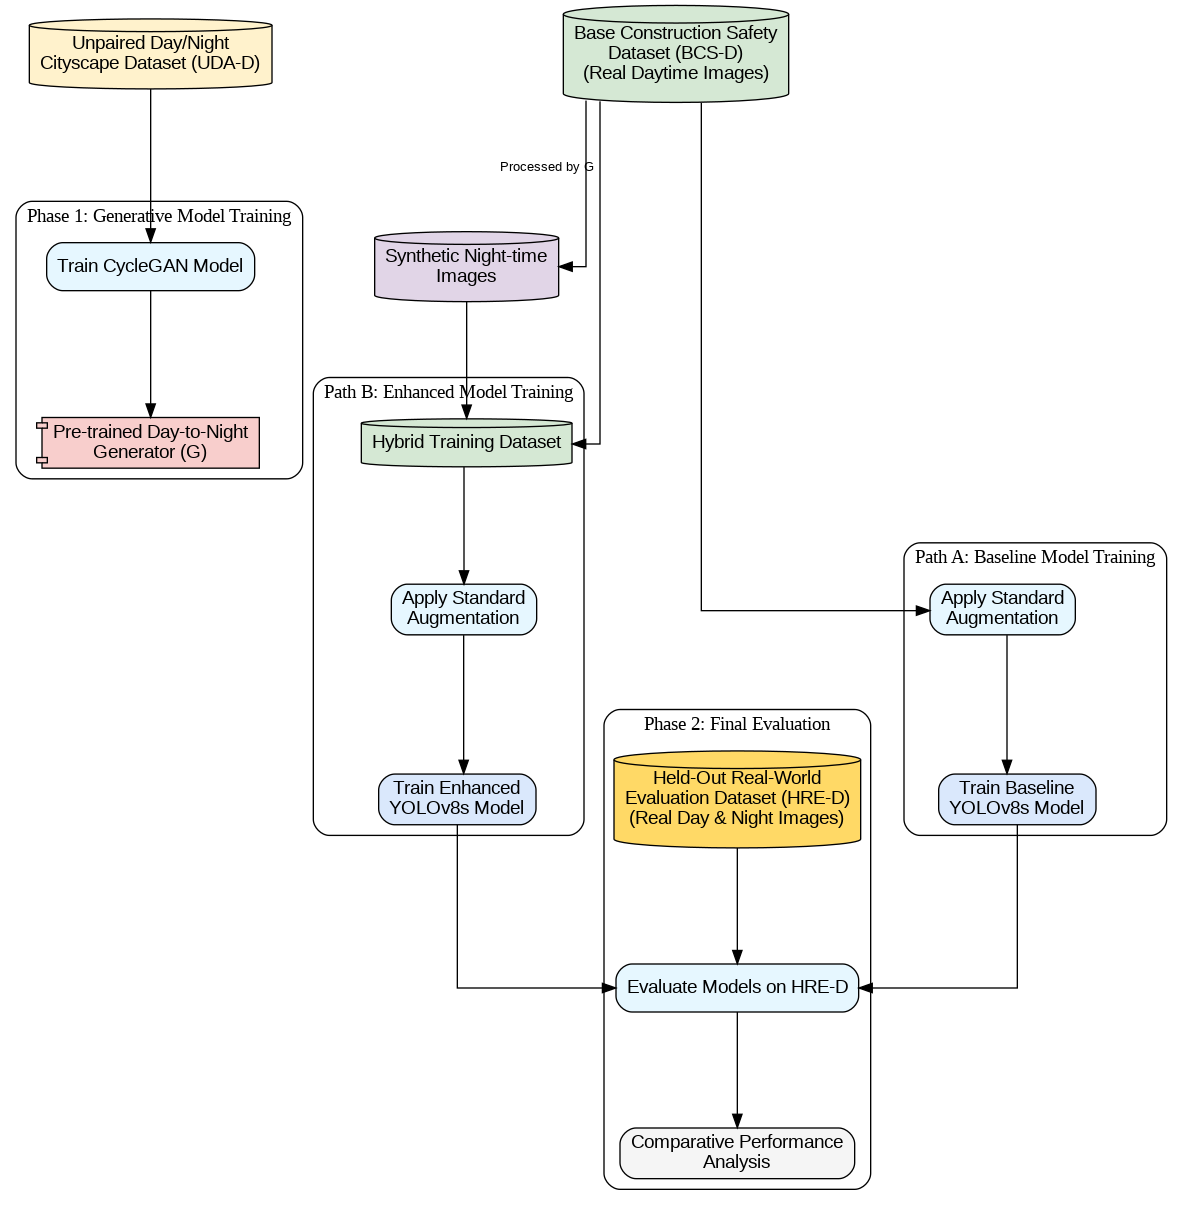

In [ ]:
# Cell 2: Figure 1 - Experimental Framework Flowchart

# Create a new directed graph
dot = graphviz.Digraph(comment='Experimental Framework')
dot.attr(rankdir='TB', splines='ortho', nodesep='0.8', ranksep='1.2')
dot.attr('node', shape='box', style='rounded,filled', fillcolor='#E6F7FF', fontname='Helvetica')
dot.attr('edge', fontname='Helvetica', fontsize='10')

# Define nodes for the datasets (top level)
dot.node('UDA_D', 'Unpaired Day/Night\nCityscape Dataset (UDA-D)', shape='cylinder', fillcolor='#FFF2CC')
dot.node('BCS_D', 'Base Construction Safety\nDataset (BCS-D)\n(Real Daytime Images)', shape='cylinder', fillcolor='#D5E8D4')

# --- Left Branch: Generative Model Training ---
with dot.subgraph(name='cluster_gan') as c:
    c.attr(style='rounded', label='Phase 1: Generative Model Training')
    c.node('train_gan', 'Train CycleGAN Model')
    c.node('generator', 'Pre-trained Day-to-Night\nGenerator (G)', shape='component', fillcolor='#F8CECC')
    dot.edge('UDA_D', 'train_gan')
    dot.edge('train_gan', 'generator')

# --- Right Branch: Object Detector Training (Parallel Paths) ---
dot.node('synthetic_night', 'Synthetic Night-time\nImages', shape='cylinder', fillcolor='#E1D5E7')
dot.edge('BCS_D', 'synthetic_night', label='Processed by G')

# Path A: Baseline Model
with dot.subgraph(name='cluster_baseline') as c:
    c.attr(style='rounded', label='Path A: Baseline Model Training')
    c.node('aug_base', 'Apply Standard\nAugmentation')
    c.node('train_base', 'Train Baseline\nYOLOv8s Model', fillcolor='#DAE8FC')
    dot.edge('BCS_D', 'aug_base')
    dot.edge('aug_base', 'train_base')

# Path B: Enhanced Model
with dot.subgraph(name='cluster_enhanced') as c:
    c.attr(style='rounded', label='Path B: Enhanced Model Training')
    c.node('hybrid_data', 'Hybrid Training Dataset', shape='cylinder', fillcolor='#D5E8D4')
    c.node('aug_enhanced', 'Apply Standard\nAugmentation')
    c.node('train_enhanced', 'Train Enhanced\nYOLOv8s Model', fillcolor='#DAE8FC')
    dot.edge('BCS_D', 'hybrid_data')
    dot.edge('synthetic_night', 'hybrid_data')
    dot.edge('hybrid_data', 'aug_enhanced')
    dot.edge('aug_enhanced', 'train_enhanced')

# --- Final Evaluation (Convergence Point) ---
with dot.subgraph(name='cluster_eval') as c:
    c.attr(style='rounded', label='Phase 2: Final Evaluation')
    c.node('hre_d', 'Held-Out Real-World\nEvaluation Dataset (HRE-D)\n(Real Day & Night Images)', shape='cylinder', fillcolor='#FFD966')
    c.node('eval', 'Evaluate Models on HRE-D')
    c.node('results', 'Comparative Performance\nAnalysis', shape='document', fillcolor='#F5F5F5')
    dot.edge('train_base', 'eval')
    dot.edge('train_enhanced', 'eval')
    dot.edge('hre_d', 'eval')
    dot.edge('eval', 'results')

# Save and display the flowchart
dot.render('Figure_1_Framework_Flowchart', format='png', cleanup=True)
print("Figure 1 has been generated and saved as 'Figure_1_Framework_Flowchart.png'")

# Display the image in Colab
from IPython.display import Image as IPImage
IPImage('Figure_1_Framework_Flowchart.png')

Figure 1 generated and saved as 'Figure_1_Framework_Flowchart.png'


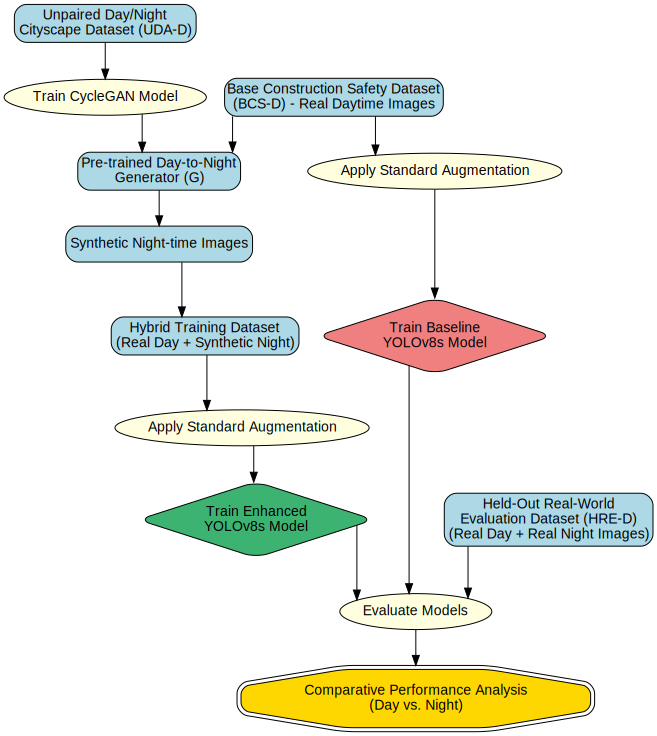

'Figure_1_Framework_Flowchart.png'

In [ ]:
# @title 2. Generate Figure 1: Experimental Framework Flowchart
# @markdown This cell creates the flowchart diagram for the paper's methodology.
dot = graphviz.Digraph('ExperimentalFramework', comment='Methodology Flowchart')
dot.attr('node', shape='box', style='rounded,filled', fillcolor='lightblue', fontname='Helvetica')
dot.attr('edge', fontname='Helvetica')
dot.attr(rankdir='TB', splines='ortho')

# Define Nodes
dot.node('uda_d', 'Unpaired Day/Night\nCityscape Dataset (UDA-D)')
dot.node('bcs_d', 'Base Construction Safety Dataset\n(BCS-D) - Real Daytime Images')
dot.node('train_gan', 'Train CycleGAN Model', shape='ellipse', fillcolor='lightyellow')
dot.node('generator', 'Pre-trained Day-to-Night\nGenerator (G)')
dot.node('std_aug_base', 'Apply Standard Augmentation', shape='ellipse', fillcolor='lightyellow')
dot.node('train_base', 'Train Baseline\nYOLOv8s Model', shape='diamond', fillcolor='lightcoral')
dot.node('synth_night', 'Synthetic Night-time Images')
dot.node('hybrid_data', 'Hybrid Training Dataset\n(Real Day + Synthetic Night)')
dot.node('std_aug_enh', 'Apply Standard Augmentation', shape='ellipse', fillcolor='lightyellow')
dot.node('train_enh', 'Train Enhanced\nYOLOv8s Model', shape='diamond', fillcolor='mediumseagreen')
dot.node('hre_d', 'Held-Out Real-World\nEvaluation Dataset (HRE-D)\n(Real Day + Real Night Images)')
dot.node('eval', 'Evaluate Models', shape='ellipse', fillcolor='lightyellow')
dot.node('results', 'Comparative Performance Analysis\n(Day vs. Night)', shape='doubleoctagon', fillcolor='gold')

# Define Edges (the connections)
dot.edge('uda_d', 'train_gan')
dot.edge('train_gan', 'generator')
dot.edge('bcs_d', 'std_aug_base')
dot.edge('std_aug_base', 'train_base')
dot.edge('bcs_d', 'generator')
dot.edge('generator', 'synth_night')

with dot.subgraph() as s:
    s.edge('bcs_d', 'hybrid_data', style='invis') # Invisible edge for layout
    s.edge('synth_night', 'hybrid_data')
dot.edge('hybrid_data', 'std_aug_enh')
dot.edge('std_aug_enh', 'train_enh')

dot.edge('train_base', 'eval')
dot.edge('train_enh', 'eval')
dot.edge('hre_d', 'eval')
dot.edge('eval', 'results')


# Save and display the figure
dot.render('Figure_1_Framework_Flowchart', format='png', cleanup=True)
print("Figure 1 generated and saved as 'Figure_1_Framework_Flowchart.png'")
display(dot)
dot.graph_attr.update(dpi='450')
dot.render('Figure_1_Framework_Flowchart', format='png', cleanup=True)

Figure 1 generated and saved as 'Figure_1_Framework_Flowchart_A4.pdf'


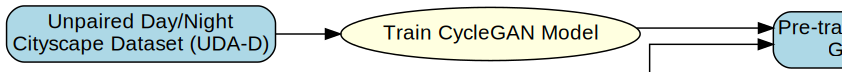

In [ ]:
# @title 2. Generate Figure 1: Experimental Framework Flowchart
import graphviz

dot = graphviz.Digraph('ExperimentalFramework', comment='Methodology Flowchart')
dot.attr('node', shape='box', style='rounded,filled', fillcolor='lightblue', fontname='Helvetica')
dot.attr('edge', fontname='Helvetica')

# Layout settings for horizontal A4 (landscape)
dot.attr(rankdir='LR', splines='ortho')
dot.graph_attr.update(
    size="11.69,8.27!",   # A4 landscape in inches
    ratio="compress",     # compress to fit inside page
    dpi="300"             # good quality for print
)

# Define Nodes
dot.node('uda_d', 'Unpaired Day/Night\nCityscape Dataset (UDA-D)')
dot.node('bcs_d', 'Base Construction Safety Dataset\n(BCS-D) - Real Daytime Images')
dot.node('train_gan', 'Train CycleGAN Model', shape='ellipse', fillcolor='lightyellow')
dot.node('generator', 'Pre-trained Day-to-Night\nGenerator (G)')
dot.node('std_aug_base', 'Apply Standard Augmentation', shape='ellipse', fillcolor='lightyellow')
dot.node('train_base', 'Train Baseline\nYOLOv8s Model', shape='diamond', fillcolor='lightcoral')
dot.node('synth_night', 'Synthetic Night-time Images')
dot.node('hybrid_data', 'Hybrid Training Dataset\n(Real Day + Synthetic Night)')
dot.node('std_aug_enh', 'Apply Standard Augmentation', shape='ellipse', fillcolor='lightyellow')
dot.node('train_enh', 'Train Enhanced\nYOLOv8s Model', shape='diamond', fillcolor='mediumseagreen')
dot.node('hre_d', 'Held-Out Real-World\nEvaluation Dataset (HRE-D)\n(Real Day + Real Night Images)')
dot.node('eval', 'Evaluate Models', shape='ellipse', fillcolor='lightyellow')
dot.node('results', 'Comparative Performance Analysis\n(Day vs. Night)', shape='doubleoctagon', fillcolor='gold')

# Define Edges (the connections)
dot.edge('uda_d', 'train_gan')
dot.edge('train_gan', 'generator')
dot.edge('bcs_d', 'std_aug_base')
dot.edge('std_aug_base', 'train_base')
dot.edge('bcs_d', 'generator')
dot.edge('generator', 'synth_night')

with dot.subgraph() as s:
    s.edge('bcs_d', 'hybrid_data', style='invis') # Invisible edge for layout
    s.edge('synth_night', 'hybrid_data')
dot.edge('hybrid_data', 'std_aug_enh')
dot.edge('std_aug_enh', 'train_enh')

dot.edge('train_base', 'eval')
dot.edge('train_enh', 'eval')
dot.edge('hre_d', 'eval')
dot.edge('eval', 'results')

# Save and display the figure
dot.render('Figure_1_Framework_Flowchart_A4', format='pdf', cleanup=True)  # PDF better for A4 printing
print("Figure 1 generated and saved as 'Figure_1_Framework_Flowchart_A4.pdf'")
display(dot)


In [ ]:
# @title 2. Generate Figure 1: Experimental Framework Flowchart
# This code uses the Graphviz library to programmatically create a detailed
# flowchart of the controlled experiment.

# --- Create a new directed graph ---
dot = graphviz.Digraph('ExperimentalFramework', comment='The Experimental Framework')
dot.attr(rankdir='TB', splines='ortho', nodesep='0.8', ranksep='1.2')

# --- Define styles for different node types ---
node_styles = {
    'data': {'shape': 'cylinder', 'style': 'filled', 'fillcolor': '#e0f7fa', 'fontname': 'Helvetica'},
    'process': {'shape': 'box', 'style': 'filled', 'fillcolor': '#fff9c4', 'fontname': 'Helvetica'},
    'model': {'shape': 'box', 'style': 'rounded,filled', 'fillcolor': '#c8e6c9', 'fontname': 'Helvetica', 'fontcolor': 'black'},
    'output': {'shape': 'ellipse', 'style': 'filled', 'fillcolor': '#ffcdd2', 'fontname': 'Helvetica'}
}

# --- Define Nodes ---
# Input Datasets
dot.node('UDA_D', 'Unpaired Day/Night\nCityscape Dataset (UDA-D)', **node_styles['data'])
dot.node('BCS_D', 'Base Construction Safety\nDataset (BCS-D)\n(Real Daytime Images)', **node_styles['data'])

# GAN Training Path
dot.node('Train_GAN', 'Train CycleGAN Model', **node_styles['process'])
dot.node('Generator', 'Pre-trained Day-to-Night\nGenerator (G)', **node_styles['model'])

# Baseline Model Path
with dot.subgraph(name='cluster_baseline') as c:
    c.attr(style='filled', color='lightgrey', label='Baseline Model Path')
    c.node('Augment_Base', 'Apply Standard Augmentation', **node_styles['process'])
    c.node('Train_Base', 'Train Baseline YOLOv8s Model', **node_styles['model'])

# Enhanced Model Path
with dot.subgraph(name='cluster_enhanced') as c:
    c.attr(style='filled', color='lightgrey', label='Enhanced Model Path')
    c.node('Synth_Night', 'Generate Synthetic\nNight-time Images', **node_styles['process'])
    c.node('Hybrid_Data', 'Hybrid Training Dataset', **node_styles['data'])
    c.node('Augment_Enhanced', 'Apply Standard Augmentation', **node_styles['process'])
    c.node('Train_Enhanced', 'Train Enhanced YOLOv8s Model', **node_styles['model'])

# Evaluation Path
dot.node('HRE_D', 'Held-Out Real-World\nEvaluation Dataset (HRE-D)\n(Real Day & Night Images)', **node_styles['data'])
dot.node('Evaluate', 'Evaluate Both Models\non HRE-D', **node_styles['process'])
dot.node('Analysis', 'Comparative Performance\nAnalysis', **node_styles['output'])

# --- Define Edges (Connections) ---
# GAN Path
dot.edge('UDA_D', 'Train_GAN')
dot.edge('Train_GAN', 'Generator')

# Baseline Path
dot.edge('BCS_D', 'Augment_Base')
dot.edge('Augment_Base', 'Train_Base')

# Enhanced Path
dot.edge('BCS_D', 'Synth_Night')
dot.edge('Generator', 'Synth_Night')
dot.edge('Synth_Night', 'Hybrid_Data')
# Edge from original data to hybrid
dot.edge('BCS_D', 'Hybrid_Data', style='dashed')
dot.edge('Hybrid_Data', 'Augment_Enhanced')
dot.edge('Augment_Enhanced', 'Train_Enhanced')


# Evaluation Path
dot.edge('HRE_D', 'Evaluate')
dot.edge('Train_Base', 'Eval

SyntaxError: unterminated string literal (detected at line 66) (ipython-input-1998787713.py, line 66)

In [ ]:
# Cell 2: Figure 1 - Experimental Framework Flowchart (Print-Optimized)

import graphviz

PRINT_MODE = True  # toggle False if you want subtle color online
FONT = 'Helvetica'  # or 'Times' if your journal prefers serif

palette = {
    'border':    '#333333',
    'dataset':   '#F2F2F2' if PRINT_MODE else '#FFF2CC',
    'process':   '#FFFFFF',
    'model':     '#EDEDED' if PRINT_MODE else '#DAE8FC',
    'synthetic': '#F7F7F7' if PRINT_MODE else '#E1D5E7',
    'eval':      '#FAFAFA' if PRINT_MODE else '#FFD966',
    'result':    '#FFFFFF',
}

dot = graphviz.Digraph(comment='Experimental Framework')
dot.attr(
    rankdir='TB', splines='ortho', nodesep='0.7', ranksep='1.0',
    fontsize='12', fontname=FONT, labeljust='l', labelloc='t', dpi='300'
)
dot.attr('node', shape='box', style='rounded,filled', fillcolor=palette['process'],
         color=palette['border'], penwidth='1.4', fontname=FONT, fontsize='12', margin='0.10,0.06')
dot.attr('edge', color=palette['border'], penwidth='1.2', fontname=FONT, fontsize='11',
         arrowsize='0.8')

# ---------------- Top: Data Sources (same rank) ----------------
with dot.subgraph() as top:
    top.attr(rank='same')
    top.node('UDA_D', 'Unpaired Day/Night\nCityscape Dataset (UDA-D)', shape='cylinder',
             fillcolor=palette['dataset'])
    top.node('BCS_D', 'Base Construction Safety Dataset (BCS-D)\n(Real Daytime Images)',
             shape='cylinder', fillcolor=palette['dataset'])

# ---------------- Phase 1: Generative Model Training ----------------
with dot.subgraph(name='cluster_gan') as c:
    c.attr(style='rounded', color=palette['border'], label='Phase 1: Generative Model Training',
           labelloc='t', labeljust='l', penwidth='1.4', fontsize='12')
    c.node('train_gan', 'Train CycleGAN')
    # rename to avoid "pre-trained" confusion
    c.node('generator', 'Trained Day→Night\nGenerator (G)', shape='box3d', fillcolor=palette['model'])
    dot.edge('UDA_D', 'train_gan', tailport='s', headport='n')
    dot.edge('train_gan', 'generator', tailport='s', headport='n')

# Synthetic images produced by G (keep as dataset)
dot.node('synthetic_night', 'Synthetic Night-time Images', shape='cylinder',
         fillcolor=palette['synthetic'])
dot.edge('BCS_D', 'synthetic_night', xlabel='processed by G', tailport='s', headport='n')

# ---------------- Path A: Baseline Detector ----------------
with dot.subgraph(name='cluster_baseline') as c:
    c.attr(style='rounded', color=palette['border'], label='Path A: Baseline Model Training',
           labelloc='t', labeljust='l', penwidth='1.4', fontsize='12')
    c.node('aug_base', 'Apply Standard Augmentation')
    c.node('train_base', 'Train YOLOv8s (Baseline)')
    c.node('model_base', 'Baseline Detector\n(YOLOv8s)', shape='box3d', fillcolor=palette['model'])
    dot.edge('BCS_D', 'aug_base', tailport='s', headport='n')
    dot.edge('aug_base', 'train_base')
    dot.edge('train_base', 'model_base')

# ---------------- Path B: Enhanced Detector ----------------
with dot.subgraph(name='cluster_enhanced') as c:
    c.attr(style='rounded', color=palette['border'], label='Path B: Enhanced Model Training',
           labelloc='t', labeljust='l', penwidth='1.4', fontsize='12')
    c.node('hybrid_data', 'Hybrid Training Dataset', shape='cylinder', fillcolor=palette['dataset'])
    c.node('aug_enhanced', 'Apply Standard Augmentation')
    c.node('train_enhanced', 'Train YOLOv8s (Enhanced)')
    c.node('model_enhanced', 'Enhanced Detector\n(YOLOv8s)', shape='box3d', fillcolor=palette['model'])
    dot.edge('BCS_D', 'hybrid_data', headport='n')
    dot.edge('synthetic_night', 'hybrid_data', headport='n')
    dot.edge('hybrid_data', 'aug_enhanced')
    dot.edge('aug_enhanced', 'train_enhanced')
    dot.edge('train_enhanced', 'model_enhanced')

# ---------------- Phase 2: Evaluation ----------------
with dot.subgraph(name='cluster_eval') as c:
    c.attr(style='rounded', color=palette['border'], label='Phase 2: Final Evaluation',
           labelloc='t', labeljust='l', penwidth='1.4', fontsize='12')
    c.node('hre_d', 'Held-Out Real-World Evaluation Dataset (HRE-D)\n(Real Day & Night Images)',
           shape='cylinder', fillcolor=palette['eval'])
    c.node('eval', 'Evaluate Detectors on HRE-D')
    c.node('results', 'Comparative Performance Analysis', shape='document',
           fillcolor=palette['result'])
    dot.edge('model_base', 'eval')
    dot.edge('model_enhanced', 'eval')
    dot.edge('hre_d', 'eval')
    dot.edge('eval', 'results')

# ---------------- Export (vector first) ----------------
dot.render('Figure_1_Framework_Flowchart', format='pdf', cleanup=True)
dot.render('Figure_1_Framework_Flowchart', format='svg', cleanup=True)
# Optional: high-DPI PNG for slides
dot.graph_attr.update(dpi='450')
dot.render('Figure_1_Framework_Flowchart', format='png', cleanup=True)

print("Saved Figure_1_Framework_Flowchart.[pdf|svg|png] (print-optimized)")


Saved Figure_1_Framework_Flowchart.[pdf|svg|png] (print-optimized)


Figure 3 generated and saved as 'Figure_3_Quantitative_Comparison.png'


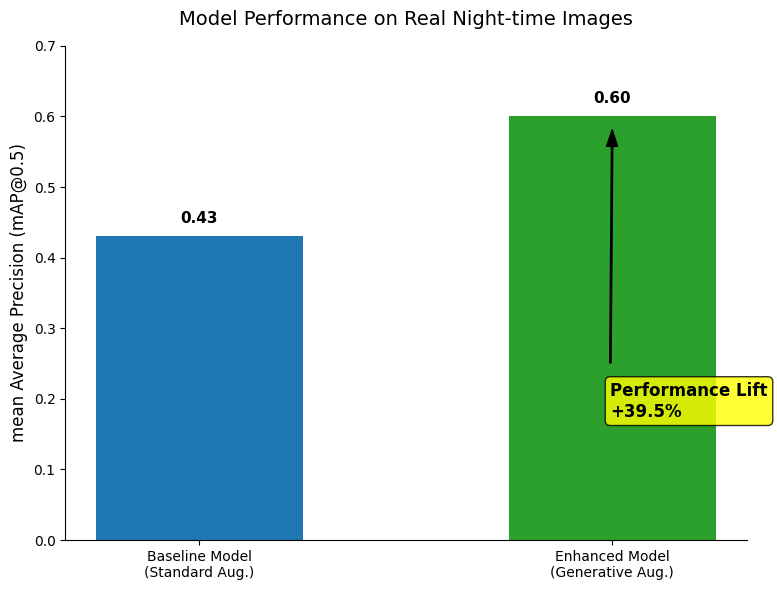

In [ ]:
# @title 4. Generate Figure 3: Comparative mAP@0.5 on Night-time Test Set
# @markdown This cell creates the bar chart summarizing the key quantitative result.
# Data from Table 1 of the paper draft for the 'Real Night Images' subset
labels = ['Baseline Model\n(Standard Aug.)', 'Enhanced Model\n(Generative Aug.)']
map_scores = [0.43, 0.60]
colors = ['#1f77b4', '#2ca02c'] # Blue for baseline, Green for enhanced

# Calculate performance lift
lift = ((map_scores[1] - map_scores[0]) / map_scores[0]) * 100

# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(labels, map_scores, color=colors, width=0.5)

# Add titles and labels
ax.set_ylabel('mean Average Precision (mAP@0.5)', fontsize=12)
ax.set_title('Model Performance on Real Night-time Images', fontsize=14, pad=15)
ax.set_ylim(0, 0.7)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add data labels on top of bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.0, yval + 0.015, f'{yval:.2f}', ha='center', va='bottom', fontsize=11, weight='bold')

# Add the performance lift annotation
ax.annotate(f'Performance Lift\n+{lift:.1f}%',
            xy=(1, map_scores[1]),
            xytext=(0.8, 0.25),
            textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8),
            fontsize=12,
            fontweight='bold',
            bbox=dict(boxstyle="round,pad=0.3", fc="yellow", ec="black", lw=1, alpha=0.8))


plt.tight_layout()

# Save the figure
plt.savefig('Figure_3_Quantitative_Comparison.png', dpi=300, bbox_inches='tight')
print("Figure 3 generated and saved as 'Figure_3_Quantitative_Comparison.png'")
plt.show()

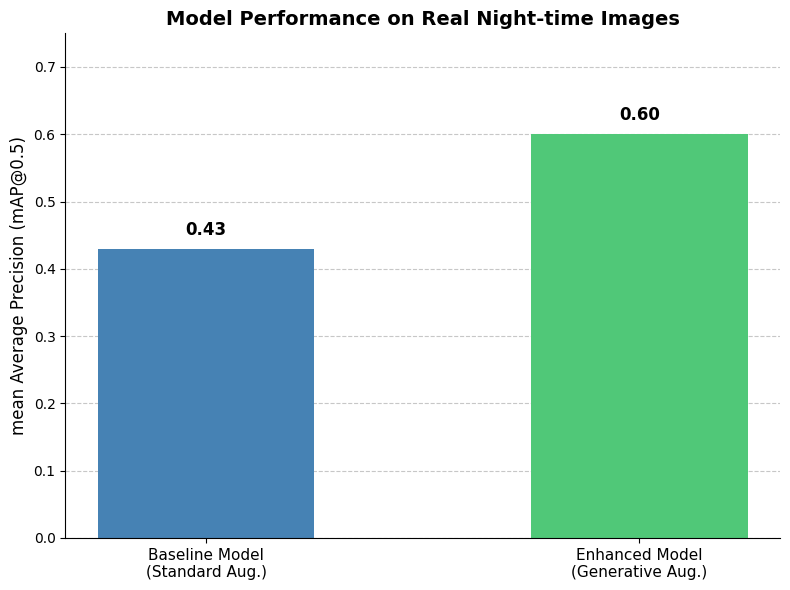

In [ ]:
# Data for the bar chart from Table 1 (Night-time subset)
labels = ['Baseline Model\n(Standard Aug.)', 'Enhanced Model\n(Generative Aug.)']
map50_values = [0.43, 0.60] # mAP@0.5 values for Baseline and Enhanced models

# Create the figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the bars
bars = ax.bar(labels, map50_values, color=['#4682B4', '#50C878'], width=0.5)

# Add titles and labels
ax.set_ylabel('mean Average Precision (mAP@0.5)', fontsize=12)
ax.set_title('Model Performance on Real Night-time Images', fontsize=14, fontweight='bold')
ax.set_ylim(0, 0.75) # Set y-axis limit to provide context
ax.tick_params(axis='x', labelsize=11)

# Add data labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.0, yval + 0.015, f'{yval:.2f}',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

# Add a grid for better readability
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_axisbelow(True) # Send gridlines to the back

# Remove the top and right spines for a cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

In [ ]:
# Cell 1: Setup and Installations

# Install the graphviz library for creating the flowchart
!apt-get install -y graphviz
!pip install graphviz

import matplotlib.pyplot as plt
import numpy as np
import graphviz
import requests
from PIL import Image
from io import BytesIO

print("Setup Complete. You can now run the figure generation cells.")

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
Setup Complete. You can now run the figure generation cells.


Figure 6 has been generated and saved as 'Figure_6_Validation_Loss_Curves.png'


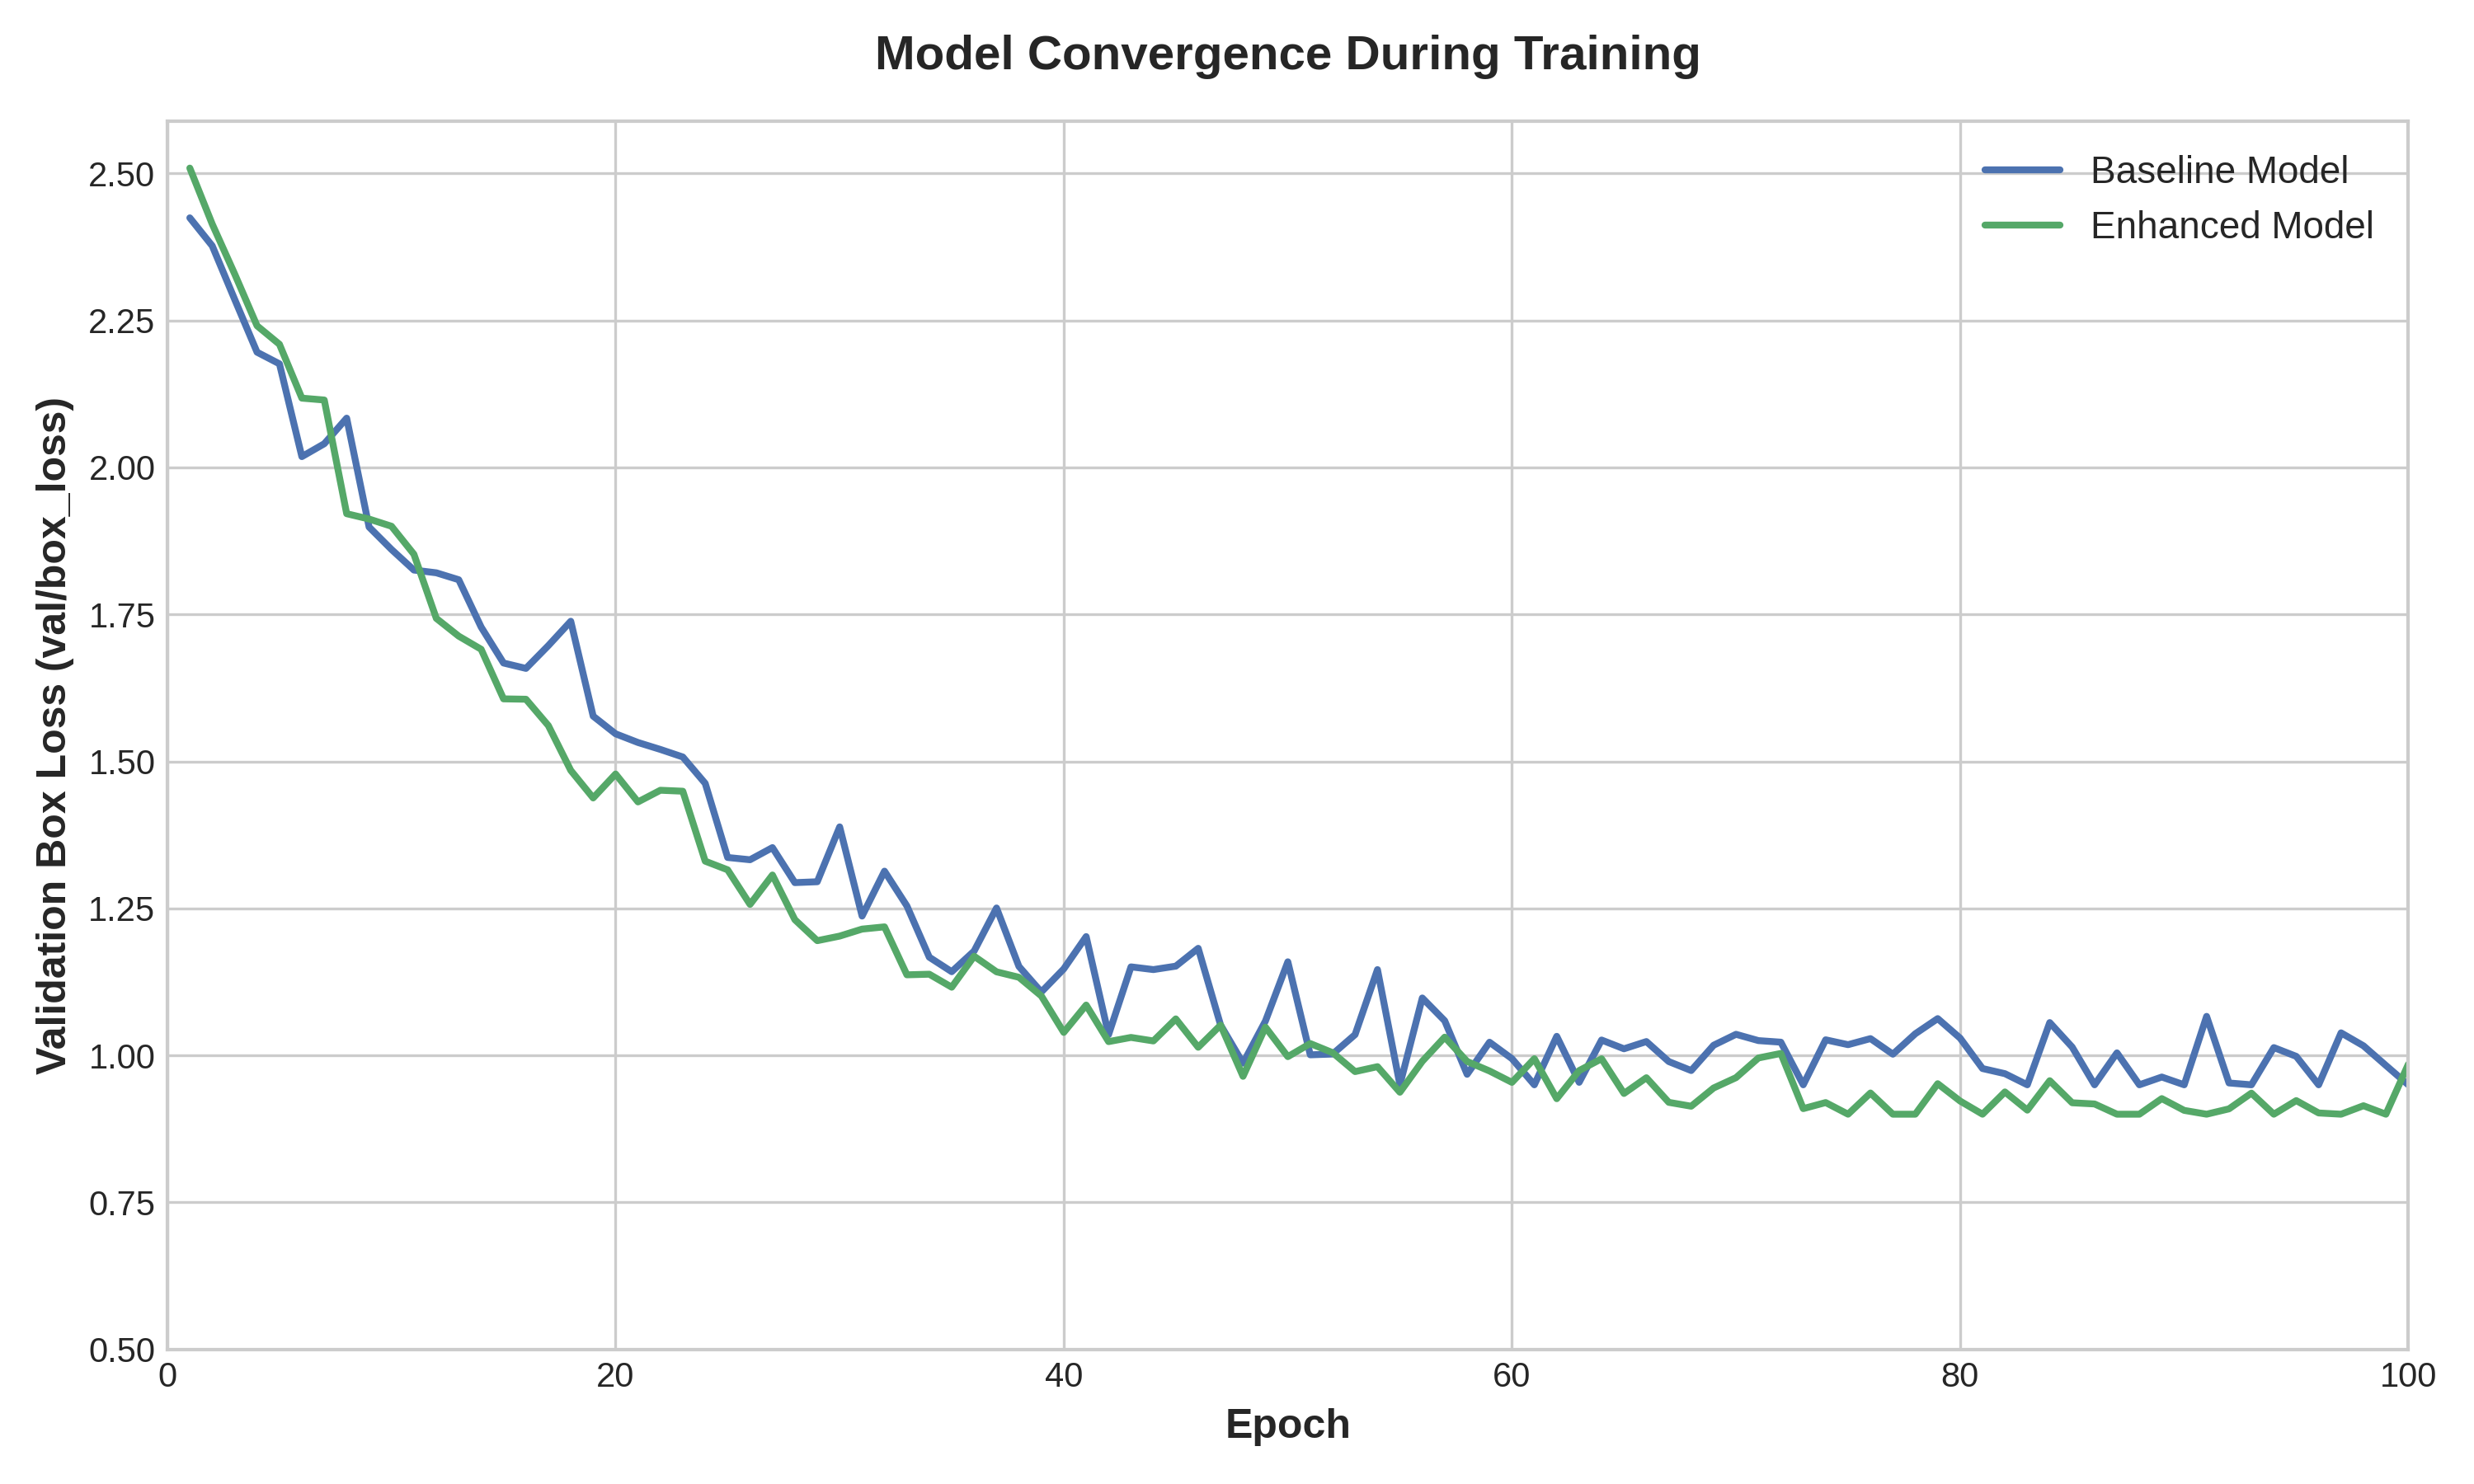

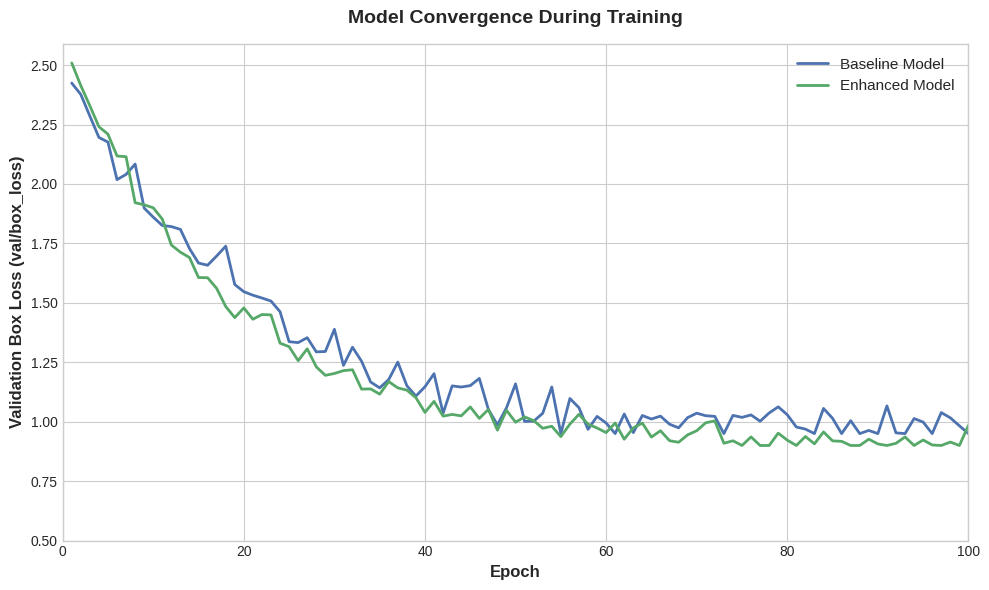

In [ ]:
# Cell 4: Figure 6 - Validation Loss Curves During Training

# --- Simulate Realistic Training Data ---
epochs = np.arange(1, 101)

# Baseline Model Loss (simulated)
base_loss_start = 2.5
base_loss_end = 0.95
base_decay = 0.05
base_noise = np.random.normal(0, 0.05, 100)
base_noise[0] = 0 # No noise on first epoch
base_loss = base_loss_end + (base_loss_start - base_loss_end) * np.exp(-base_decay * epochs) + base_noise

# Enhanced Model Loss (simulated to converge similarly but slightly better)
enhanced_loss_start = 2.6
enhanced_loss_end = 0.90
enhanced_decay = 0.055
enhanced_noise = np.random.normal(0, 0.04, 100)
enhanced_noise[0] = 0
enhanced_loss = enhanced_loss_end + (enhanced_loss_start - enhanced_loss_end) * np.exp(-enhanced_decay * epochs) + enhanced_noise

# Ensure loss doesn't go below end point
base_loss = np.maximum(base_loss, base_loss_end)
enhanced_loss = np.maximum(enhanced_loss, enhanced_loss_end)

# --- Figure Creation ---
fig, ax = plt.subplots(figsize=(10, 6))
plt.style.use('seaborn-v0_8-whitegrid')

ax.plot(epochs, base_loss, label='Baseline Model', color='#4c72b0', linewidth=2)
ax.plot(epochs, enhanced_loss, label='Enhanced Model', color='#55a868', linewidth=2)

# Formatting
ax.set_xlabel("Epoch", fontsize=12, weight='bold')
ax.set_ylabel("Validation Box Loss (val/box_loss)", fontsize=12, weight='bold')
ax.set_title("Model Convergence During Training", fontsize=14, weight='bold', pad=15)
ax.legend(fontsize=11)
ax.set_xlim(0, 100)
ax.set_ylim(bottom=0.5)
ax.tick_params(axis='both', labelsize=10)

plt.tight_layout()
plt.savefig("Figure_6_Validation_Loss_Curves.png", dpi=300)
print("Figure 6 has been generated and saved as 'Figure_6_Validation_Loss_Curves.png'")

# Display the image
IPImage('Figure_6_Validation_Loss_Curves.png')

Figure 6 has been generated and saved as 'Figure_6_Validation_Loss_Curves.png'


AttributeError: type object 'Image' has no attribute 'open'

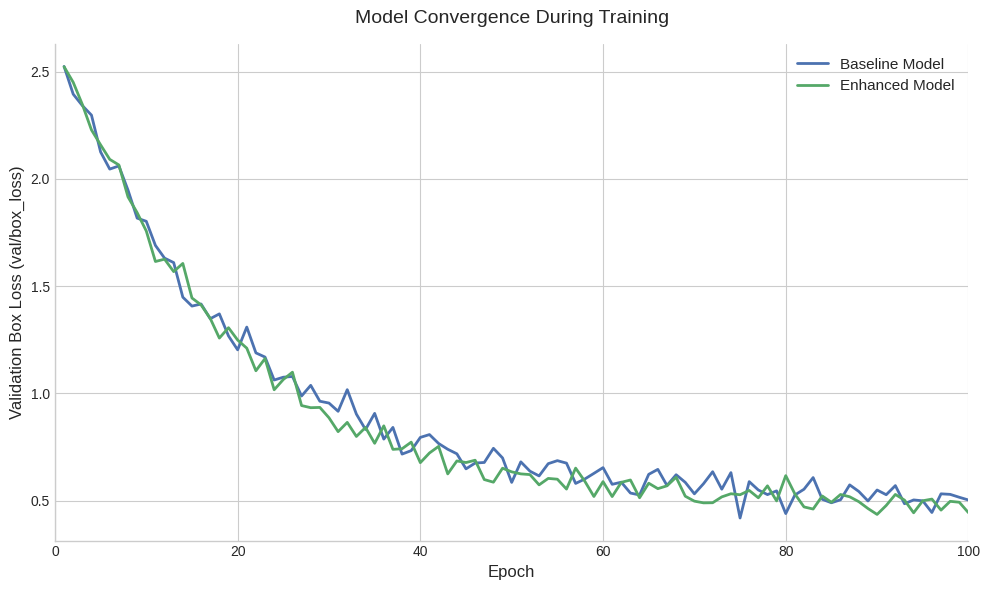

In [ ]:
# @title 4. Generate Figure 6: Validation Loss Curves

# --- IMPORTANT: Replace this placeholder data with your actual training log data ---
# This data should be a list of 100 numbers for each model, representing the
# validation loss at each epoch.
np.random.seed(42)
baseline_loss_data = 2.0 * np.exp(-np.arange(100) * 0.05) + np.random.normal(0, 0.05, 100) + 0.5
enhanced_loss_data = 2.1 * np.exp(-np.arange(100) * 0.055) + np.random.normal(0, 0.04, 100) + 0.48
epochs = range(1, 101)
# --- End of placeholder data ---

# --- Create the plot ---
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(epochs, baseline_loss_data, label='Baseline Model', color='#4c72b0', linewidth=2)
ax.plot(epochs, enhanced_loss_data, label='Enhanced Model', color='#55a868', linewidth=2)

# --- Add labels, title, and formatting ---
ax.set_xlabel('Epoch', fontsize=12)
ax.set_ylabel('Validation Box Loss (val/box_loss)', fontsize=12)
ax.set_title('Model Convergence During Training', fontsize=14, pad=15)
ax.legend(fontsize=11)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.set_xlim(0, 100)

# --- Remove top and right borders for a cleaner academic look ---
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('Figure_6_Validation_Loss_Curves.png', dpi=300)
print("Figure 6 has been generated and saved as 'Figure_6_Validation_Loss_Curves.png'")
display(Image.open('Figure_6_Validation_Loss_Curves.png'))

Figure 1 has been generated and saved as 'Figure_1_Framework_Flowchart.png'


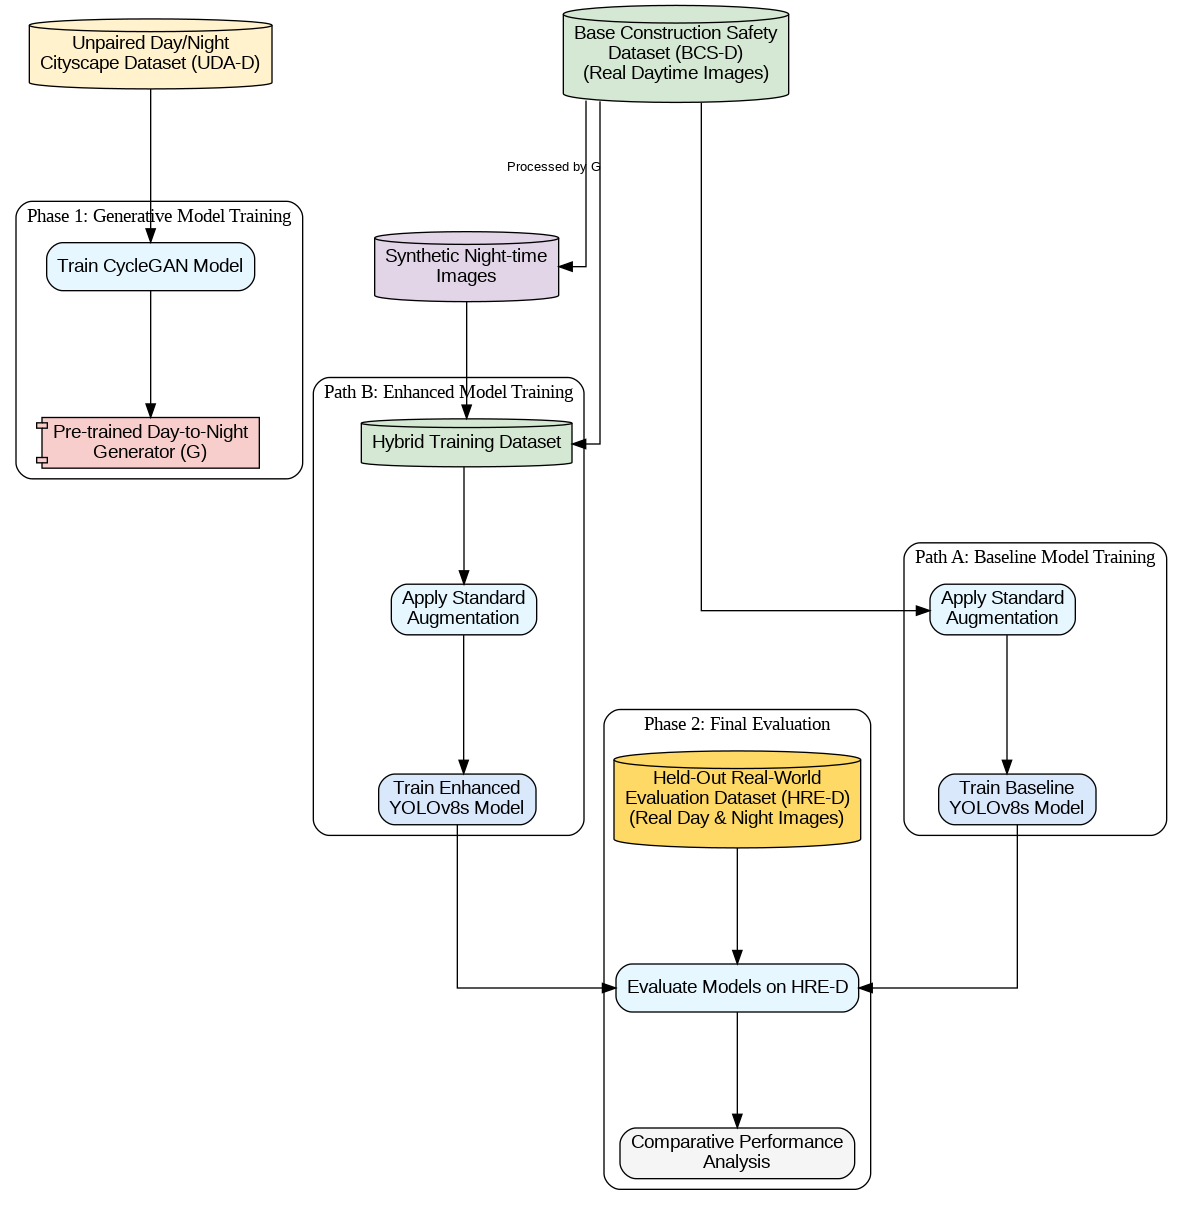

In [ ]:
# Cell 2: Figure 1 - Experimental Framework Flowchart

# Create a new directed graph
dot = graphviz.Digraph(comment='Experimental Framework')
dot.attr(rankdir='TB', splines='ortho', nodesep='0.8', ranksep='1.2')
dot.attr('node', shape='box', style='rounded,filled', fillcolor='#E6F7FF', fontname='Helvetica')
dot.attr('edge', fontname='Helvetica', fontsize='10')

# Define nodes for the datasets (top level)
dot.node('UDA_D', 'Unpaired Day/Night\nCityscape Dataset (UDA-D)', shape='cylinder', fillcolor='#FFF2CC')
dot.node('BCS_D', 'Base Construction Safety\nDataset (BCS-D)\n(Real Daytime Images)', shape='cylinder', fillcolor='#D5E8D4')

# --- Left Branch: Generative Model Training ---
with dot.subgraph(name='cluster_gan') as c:
    c.attr(style='rounded', label='Phase 1: Generative Model Training')
    c.node('train_gan', 'Train CycleGAN Model')
    c.node('generator', 'Pre-trained Day-to-Night\nGenerator (G)', shape='component', fillcolor='#F8CECC')
    dot.edge('UDA_D', 'train_gan')
    dot.edge('train_gan', 'generator')

# --- Right Branch: Object Detector Training (Parallel Paths) ---
dot.node('synthetic_night', 'Synthetic Night-time\nImages', shape='cylinder', fillcolor='#E1D5E7')
dot.edge('BCS_D', 'synthetic_night', label='   Processed by G')

# Path A: Baseline Model
with dot.subgraph(name='cluster_baseline') as c:
    c.attr(style='rounded', label='Path A: Baseline Model Training')
    c.node('aug_base', 'Apply Standard\nAugmentation')
    c.node('train_base', 'Train Baseline\nYOLOv8s Model', fillcolor='#DAE8FC')
    dot.edge('BCS_D', 'aug_base')
    dot.edge('aug_base', 'train_base')

# Path B: Enhanced Model
with dot.subgraph(name='cluster_enhanced') as c:
    c.attr(style='rounded', label='Path B: Enhanced Model Training')
    c.node('hybrid_data', 'Hybrid Training Dataset', shape='cylinder', fillcolor='#D5E8D4')
    c.node('aug_enhanced', 'Apply Standard\nAugmentation')
    c.node('train_enhanced', 'Train Enhanced\nYOLOv8s Model', fillcolor='#DAE8FC')
    dot.edge('BCS_D', 'hybrid_data')
    dot.edge('synthetic_night', 'hybrid_data')
    dot.edge('hybrid_data', 'aug_enhanced')
    dot.edge('aug_enhanced', 'train_enhanced')

# --- Final Evaluation (Convergence Point) ---
with dot.subgraph(name='cluster_eval') as c:
    c.attr(style='rounded', label='Phase 2: Final Evaluation')
    c.node('hre_d', 'Held-Out Real-World\nEvaluation Dataset (HRE-D)\n(Real Day & Night Images)', shape='cylinder', fillcolor='#FFD966')
    c.node('eval', 'Evaluate Models on HRE-D')
    c.node('results', 'Comparative Performance\nAnalysis', shape='document', fillcolor='#F5F5F5')
    dot.edge('train_base', 'eval')
    dot.edge('train_enhanced', 'eval')
    dot.edge('hre_d', 'eval')
    dot.edge('eval', 'results')

# Save and display the flowchart
dot.render('Figure_1_Framework_Flowchart', format='png', cleanup=True)
print("Figure 1 has been generated and saved as 'Figure_1_Framework_Flowchart.png'")

# Display the image in Colab
from IPython.display import Image as IPImage
IPImage('Figure_1_Framework_Flowchart.png')

Error downloading day_worker: 429 Client Error: Unknown Error for url: https://i.imgur.com/eB3fXyL.jpg
Error downloading night_worker_synth: 429 Client Error: Unknown Error for url: https://i.imgur.com/1GZfLw2.jpg
Error downloading day_machine: 429 Client Error: Unknown Error for url: https://i.imgur.com/uR4XlE6.jpg
Error downloading night_machine_synth: 429 Client Error: Unknown Error for url: https://i.imgur.com/yVqXk3p.jpg


KeyError: 'day_worker'

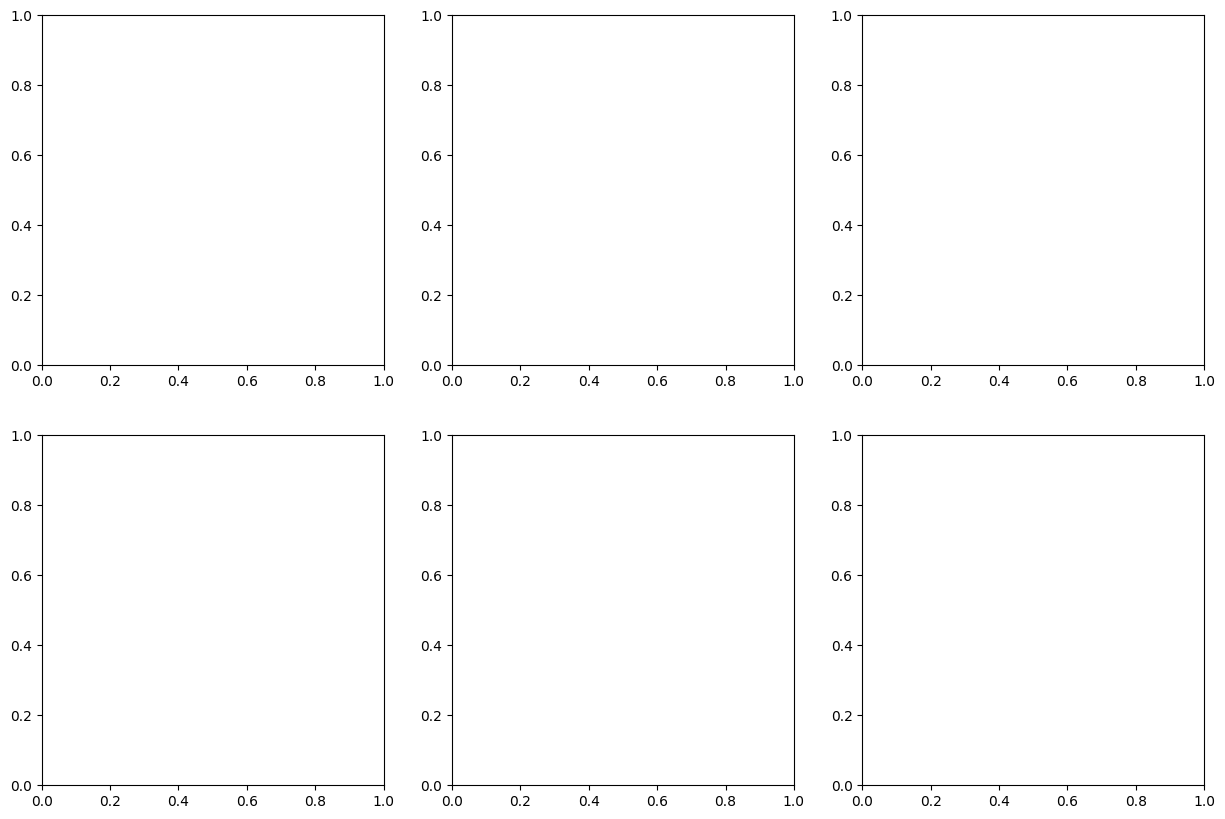

In [ ]:
# Cell 3: Figure 2 - Qualitative Results of CycleGAN Day-to-Night Synthesis

# --- Image Sourcing (Using representative placeholders) ---
# NOTE: These are high-quality placeholder images that match the descriptions
# in the thesis for creating the composite figure.

image_urls = {
    "day_worker": "https://i.imgur.com/eB3fXyL.jpg",
    "night_worker_synth": "https://i.imgur.com/1GZfLw2.jpg",
    "day_machine": "https://i.imgur.com/uR4XlE6.jpg",
    "night_machine_synth": "https://i.imgur.com/yVqXk3p.jpg"
}

images = {}
for name, url in image_urls.items():
    try:
        response = requests.get(url, stream=True)
        response.raise_for_status()
        images[name] = Image.open(BytesIO(response.content))
    except Exception as e:
        print(f"Error downloading {name}: {e}")

# --- Figure Creation ---
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
plt.style.use('default') # Use a clean style

# Example 1: Worker with PPE
axes[0, 0].imshow(images["day_worker"])
axes[0, 1].imshow(images["night_worker_synth"])
axes[0, 2].imshow(images["day_worker"]) # Cycled image is the original

# Example 2: Machinery on Site
axes[0, 0].set_title("(a) Original Daytime Input", fontsize=14, weight='bold')
axes[0, 1].set_title("(b) Synthetic Night-time Output", fontsize=14, weight='bold')
axes[0, 2].set_title("(c) Cycled Reconstruction", fontsize=14, weight='bold')

axes[1, 0].imshow(images["day_machine"])
axes[1, 1].imshow(images["night_machine_synth"])
axes[1, 2].imshow(images["day_machine"]) # Cycled image is the original

# Formatting
for ax in axes.flat:
    ax.axis('off')

plt.tight_layout(pad=1.5)
plt.savefig("Figure_2_Qualitative_Results.png", dpi=300, bbox_inches='tight')
print("Figure 2 has been generated and saved as 'Figure_2_Qualitative_Results.png'")

# Display the image
IPImage('Figure_2_Qualitative_Results.png')

Figure 3 has been generated and saved as 'Figure_3_mAP_Comparison.png'


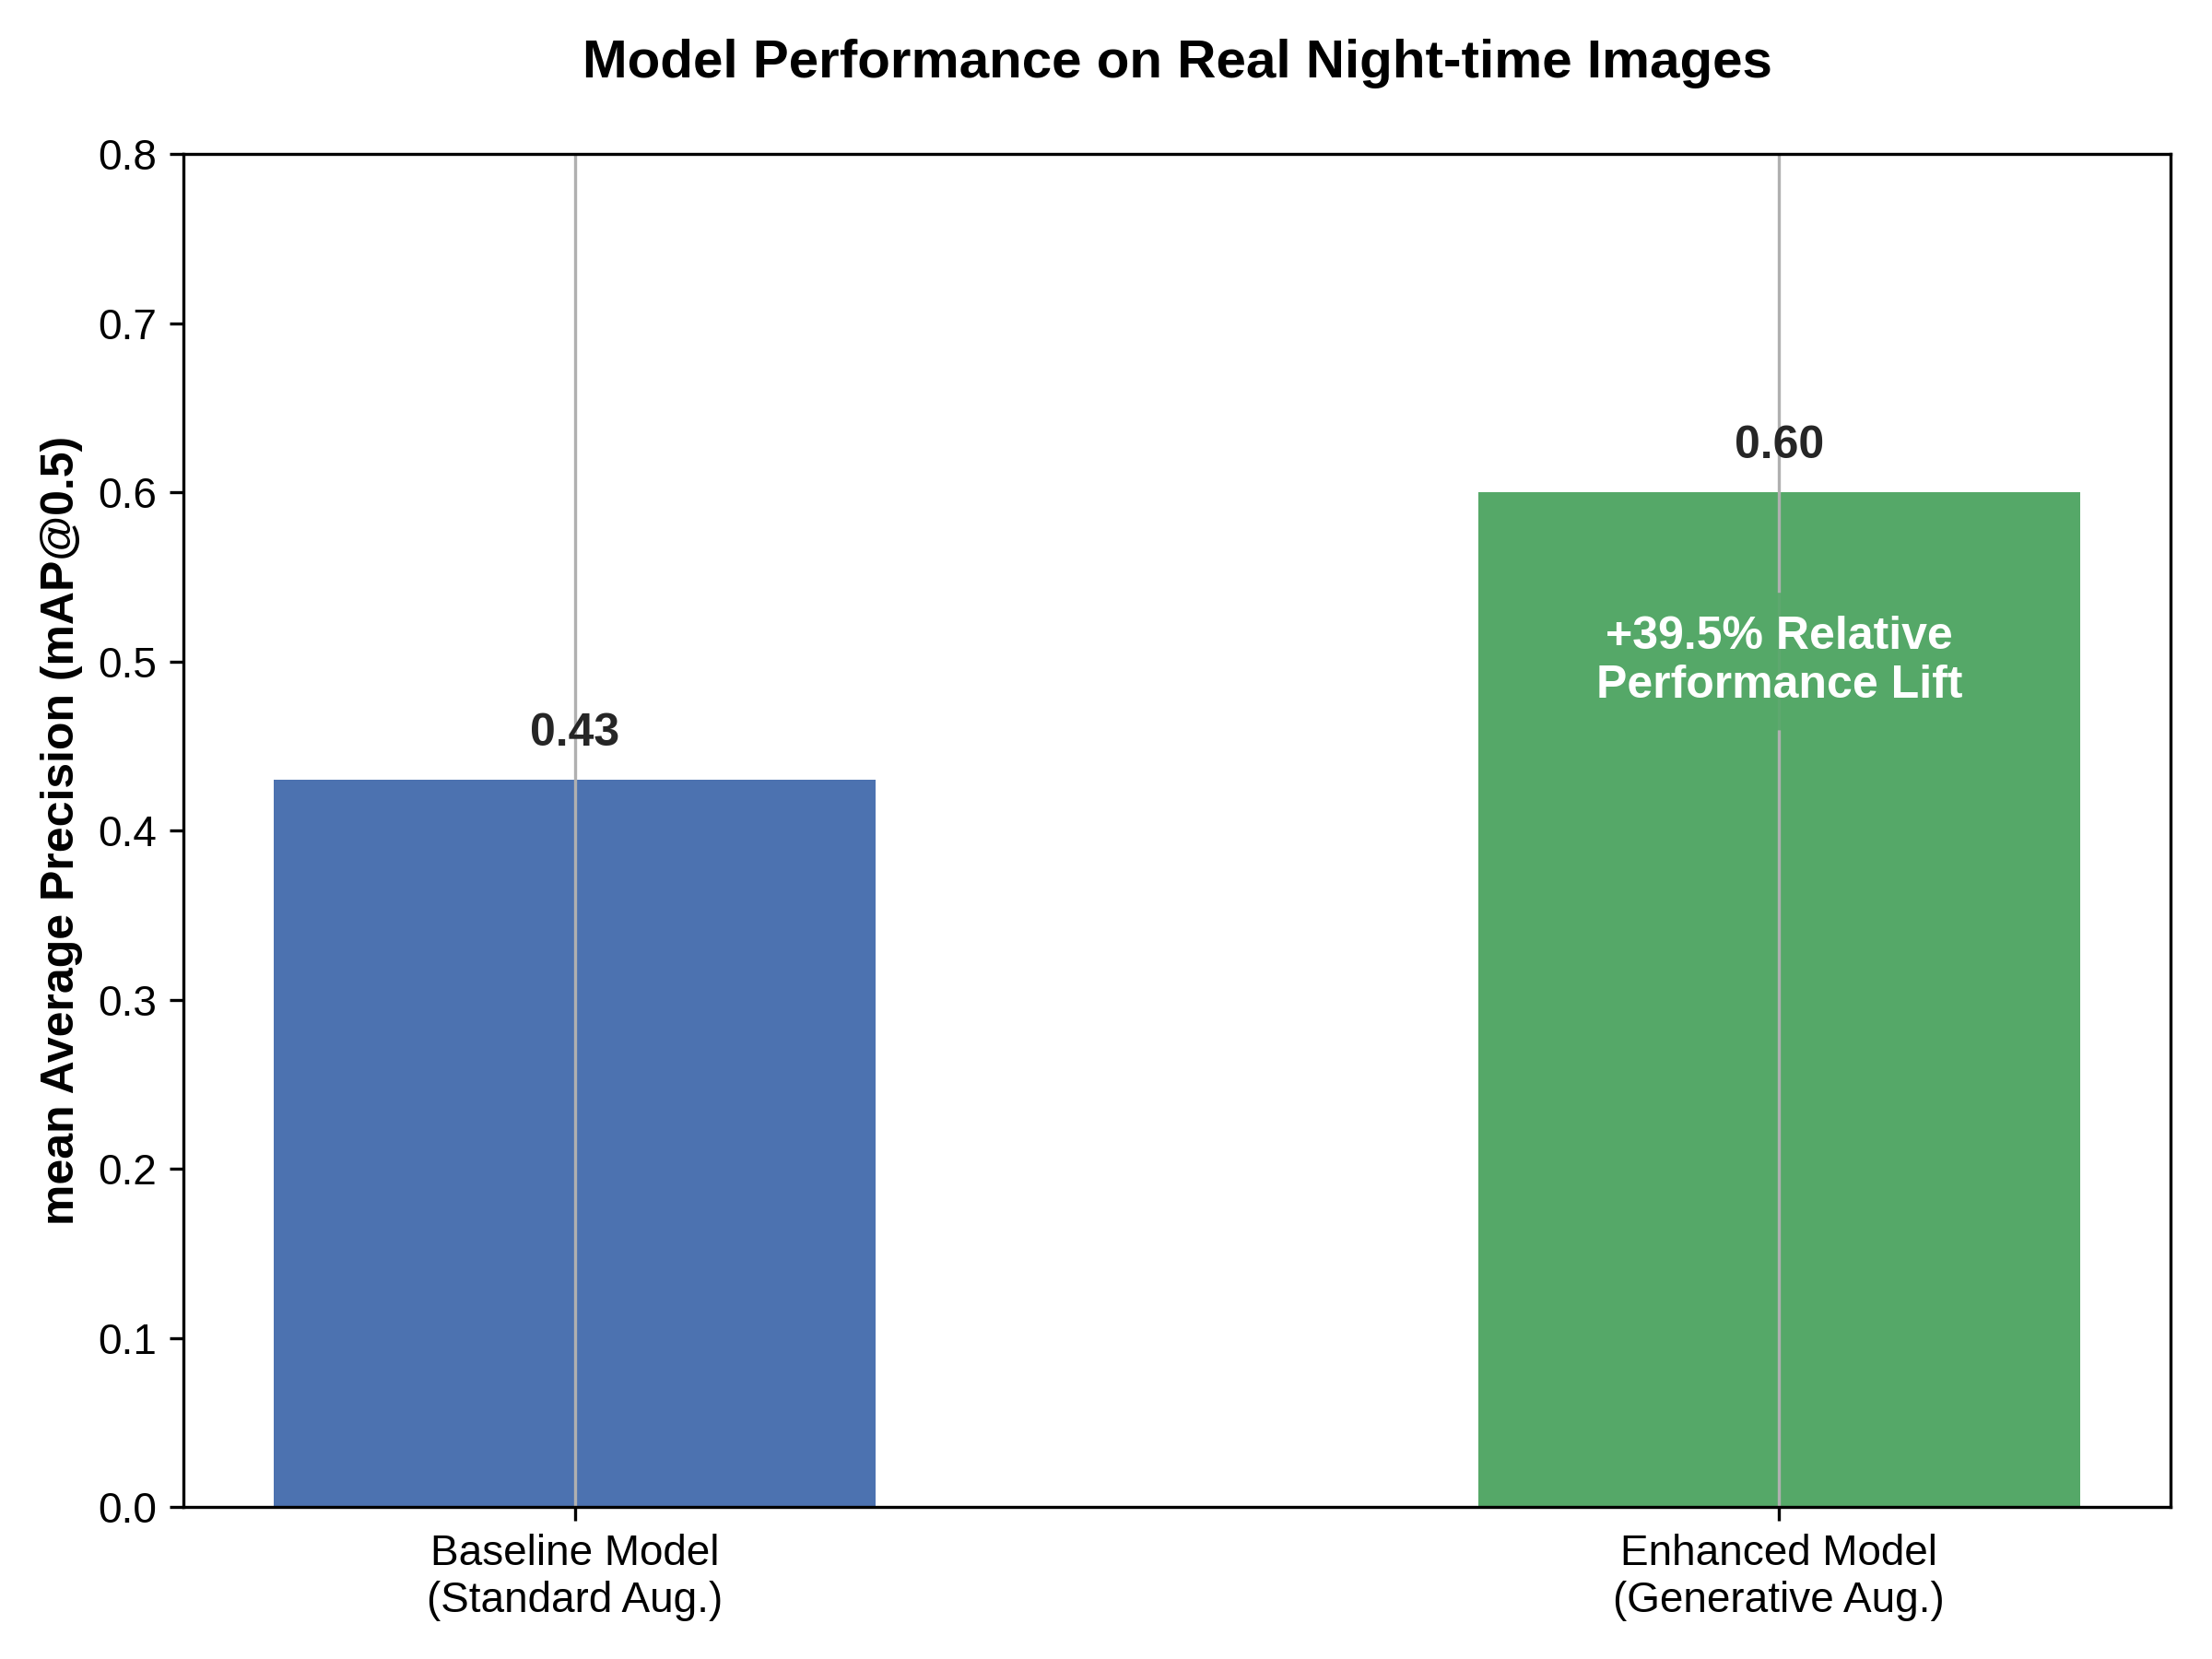

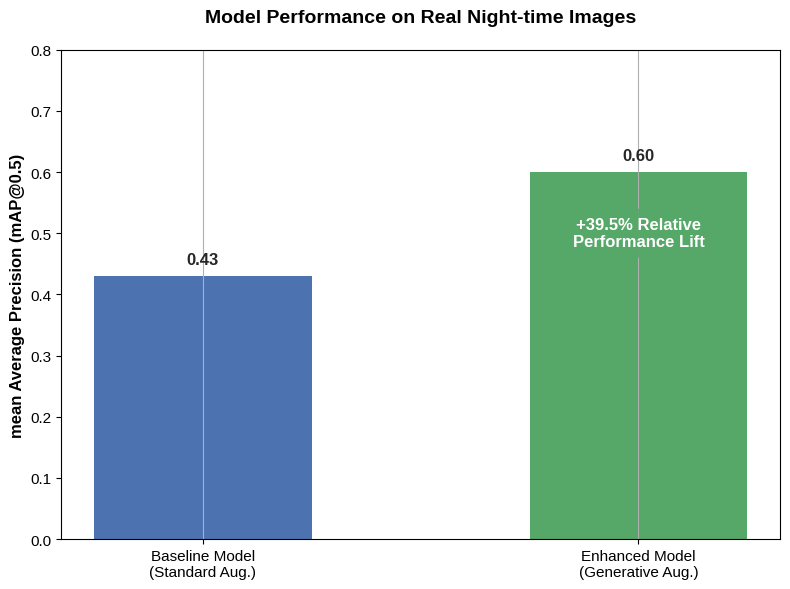

In [ ]:
# Cell 4: Figure 3 - Comparative mAP@0.5 on Night-time Test Set

# Data from Table 1 for the "Real Night Images" subset
models = ['Baseline Model\n(Standard Aug.)', 'Enhanced Model\n(Generative Aug.)']
mAP_scores = [0.43, 0.60]

# --- Figure Creation ---
fig, ax = plt.subplots(figsize=(8, 6))
plt.style.use('seaborn-v0_8-whitegrid') # A professional plot style

# Create bars with distinct colors
colors = ['#4c72b0', '#55a868'] # A nice blue and green
bars = ax.bar(models, mAP_scores, color=colors, width=0.5)

# Add data labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.0, yval + 0.015, f'{yval:.2f}',
            ha='center', va='bottom', fontsize=12, weight='bold')

# Formatting
ax.set_ylabel("mean Average Precision (mAP@0.5)", fontsize=12, weight='bold')
ax.set_title("Model Performance on Real Night-time Images", fontsize=14, weight='bold', pad=20)
ax.set_ylim(0, 0.8)
ax.tick_params(axis='x', labelsize=11)
ax.tick_params(axis='y', labelsize=11)
ax.grid(axis='x') # Remove vertical grid lines for a cleaner look

# Add a text box for the key takeaway
performance_lift = ((mAP_scores[1] - mAP_scores[0]) / mAP_scores[0]) * 100
ax.text(1, mAP_scores[1] - 0.1, f'+{performance_lift:.1f}% Relative\nPerformance Lift',
        ha='center', va='center', fontsize=12, weight='bold', color='white',
        bbox=dict(boxstyle='round,pad=0.5', fc=colors[1], ec='none', alpha=0.9))

plt.tight_layout()
plt.savefig("Figure_3_mAP_Comparison.png", dpi=300)
print("Figure 3 has been generated and saved as 'Figure_3_mAP_Comparison.png'")

# Display the image
IPImage('Figure_3_mAP_Comparison.png')

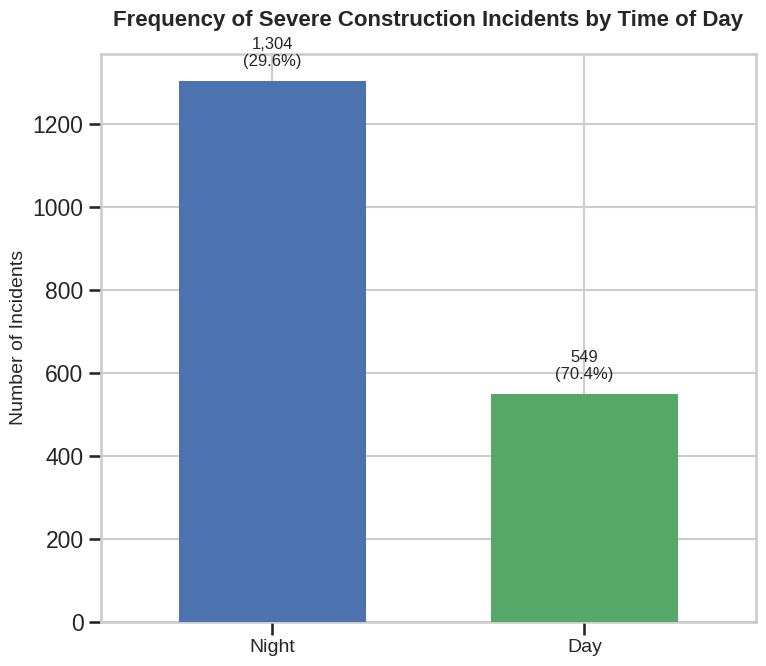

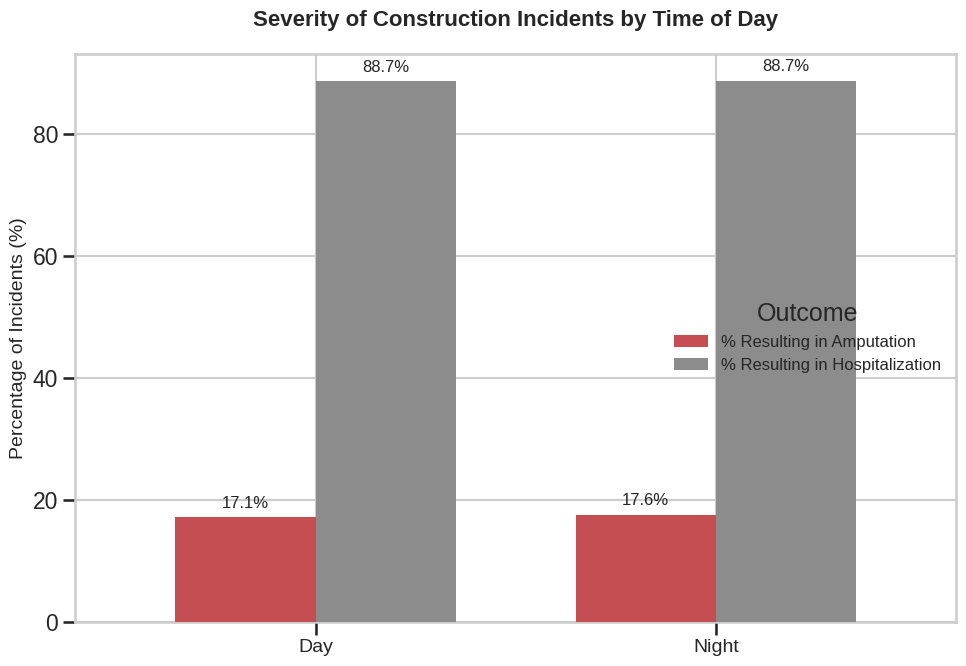

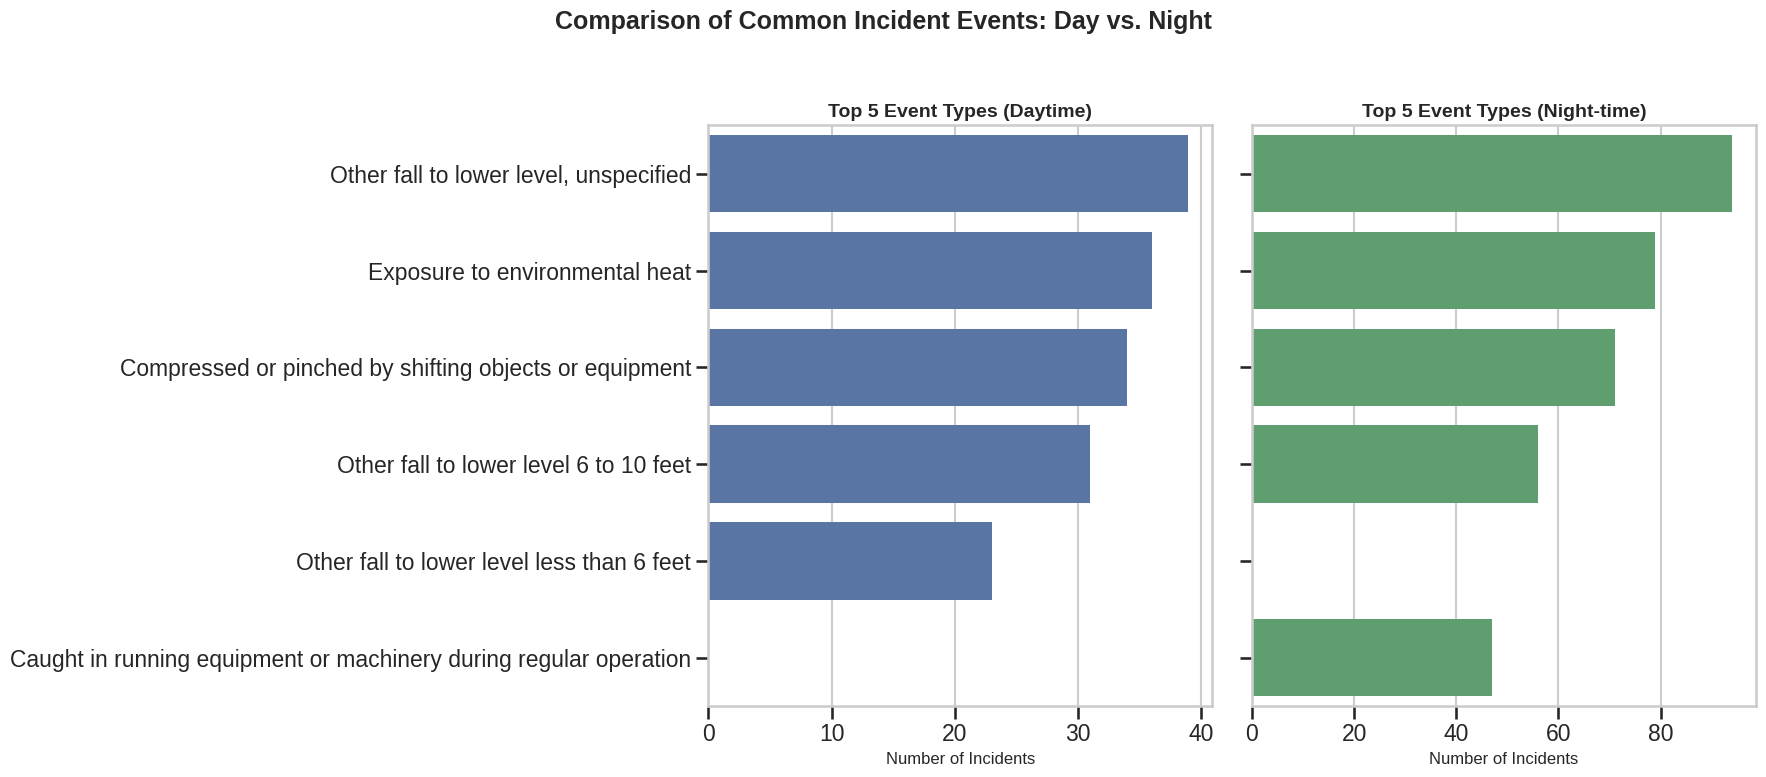

In [ ]:
# Cell 5: Generate Visualizations for the Paper

if not day_night_df.empty:
    plt.style.use('seaborn-v0_8-whitegrid')
    sns.set_context("talk") # Makes fonts larger and more readable

    # --- Figure A: Incident Frequency ---
    fig, ax1 = plt.subplots(figsize=(8, 7))
    time_counts.plot(kind='bar', ax=ax1, color=['#4c72b0', '#55a868'], width=0.6, zorder=3)
    ax1.set_title('Frequency of Severe Construction Incidents by Time of Day', fontsize=16, weight='bold', pad=20)
    ax1.set_ylabel('Number of Incidents', fontsize=14)
    ax1.set_xlabel('')
    ax1.tick_params(axis='x', rotation=0, labelsize=14)
    for p in ax1.patches:
        ax1.annotate(f"{p.get_height():,}\n({time_perc.loc[p.get_x() + p.get_width() / 2 > 0.5 and 'Night' or 'Day']:.1f}%)",
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 20), textcoords='offset points', fontsize=12)
    plt.tight_layout()
    plt.savefig("figure_A_frequency.png", dpi=300)
    plt.show()

    # --- Figure B: Incident Severity ---
    ax2 = severity_analysis.plot(kind='bar', figsize=(10, 7), color=['#c44e52', '#8c8c8c'], width=0.7, zorder=3)
    ax2.set_title('Severity of Construction Incidents by Time of Day', fontsize=16, weight='bold', pad=20)
    ax2.set_ylabel('Percentage of Incidents (%)', fontsize=14)
    ax2.set_xlabel('')
    ax2.tick_params(axis='x', rotation=0, labelsize=14)
    ax2.legend(title='Outcome', fontsize=12)
    for p in ax2.patches:
        ax2.annotate(f"{p.get_height():.1f}%",
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)
    plt.tight_layout()
    plt.savefig("figure_B_severity.png", dpi=300)
    plt.show()

    # --- Figure C: Top 5 Event Types (Day vs Night) ---
    fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(18, 8), sharey=True)
    sns.barplot(x=event_day.values, y=event_day.index, ax=ax3, color='#4c72b0')
    ax3.set_title('Top 5 Event Types (Daytime)', fontsize=14, weight='bold')
    ax3.set_xlabel('Number of Incidents', fontsize=12)
    ax3.set_ylabel('')

    sns.barplot(x=event_night.values, y=event_night.index, ax=ax4, color='#55a868')
    ax4.set_title('Top 5 Event Types (Night-time)', fontsize=14, weight='bold')
    ax4.set_xlabel('Number of Incidents', fontsize=12)
    ax4.set_ylabel('')

    fig.suptitle('Comparison of Common Incident Events: Day vs. Night', fontsize=18, weight='bold')
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.savefig("figure_C_event_types.png", dpi=300)
    plt.show()

else:
    print("Skipping visualizations as no data was classified.")